### Book chapters

See Chapter 2 Section 2 on general information about the Hodgkin-Huxley equations and models.

### Python classes

The `hodgkin_huxley.HH` module contains all code required for this exercise. It implements a Hodgkin-Huxley neuron model. At the beginning of your exercise solutions, import the modules and run the demo function.

In [1]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex.hodgkin_huxley import HH
from neurodynex.tools import input_factory

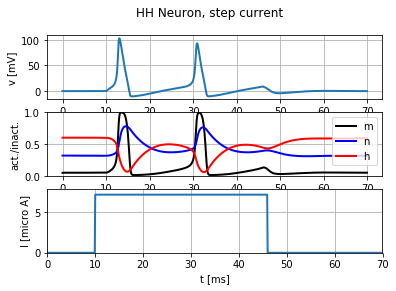

In [2]:
# Step current injection into a Hodgkin-Huxley neuron
HH.getting_started()

## 6.1. Exercise: step current response
We study the response of a Hodgkin-Huxley neuron to different input currents. Have a look at the documentation of the functions `HH.simulate_HH_neuron()` and `HH.plot_data()` and the module `neurodynex.tools.input_factory`.

In [3]:
?HH.simulate_HH_neuron()

In [4]:
?HH.plot_data()

### 6.1.1. Question
What is the lowest step current amplitude I_min for generating at least one spike? Determine the value by trying different input amplitudes in the code fragment:

```python
    current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
    state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
    HH.plot_data(state_monitor, title="HH Neuron, minimal current")
```

In [5]:
def lowest_current(I_min):
    current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
    state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
    HH.plot_data(state_monitor, title="HH Neuron, minimal current")

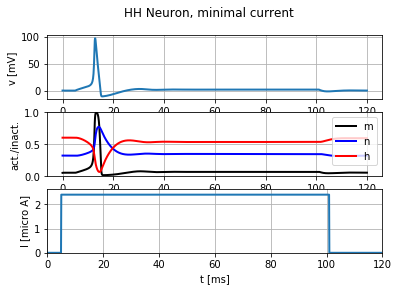

In [6]:
lowest_current(2.4)

### 6.1.2. Question
What is the lowest step current amplitude to generate repetitive firing?
Discuss the difference between the two regimes.

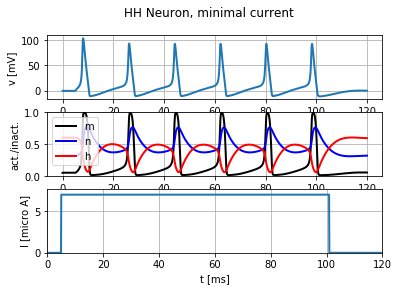

In [7]:
lowest_current(7)

## 6.2. Exercise: slow and fast ramp current
The minimal current to elicit a spike does not just depend on the amplitude I or on the total charge Q of the current, but on the “shape” of the current. Let’s see why:

### 6.2.1. Question
Inject a slow ramp current into a HH neuron. The current has amplitude `0A` at t in [0, 5] ms and linearly increases to an amplitude of `12.0uAmp` at `t=ramp_t_end`. At `t>ramp_t_end`, the current is set to `0A`. Using the following code, reduce `slow_ramp_t_end` to the maximal duration of the ramp current, such that the neuron does **not** spike. Make sure you simulate system for at least 20ms after the current stops.

What is the membrane voltage at the time when the current injection stops (t=slow_ramp_t_end)?
```python
b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 60  # no spike. make it shorter
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms)
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
voltage_slow = state_monitor.vm[0,idx_t_end]
print("voltage_slow={}".format(voltage_slow))
```

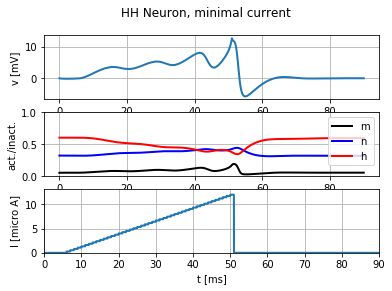

voltage_slow=0.00878306041869


In [8]:
b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 50  # no spike. make it shorter
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
voltage_slow = state_monitor.vm[0,idx_t_end]
print("voltage_slow={}".format(voltage_slow))

### 6.2.2. Question
Do the same as before but for a fast ramp current: The maximal amplitude at `t=ramp_t_end` is `4.5uAmp`. Start with `fast_ramp_t_end = 8ms` and then increase it until you observe a spike. Note: Technically the input current is implemented using a TimedArray. For a short, steep ramp, the one milliseconds discretization for the current is not high enough. You can create a finer resolution by setting the parameter `unit_time` in the function `input_factory.get_ramp_current()` (see next code block)

What is the membrane voltage at the time when the current injection stops (t=fast_ramp_t_end)?
```python
b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 80  # no spike. make it longer
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage_fast))
```

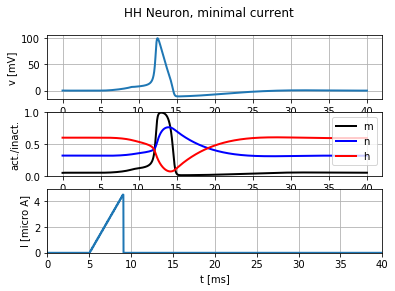

voltage_fast=0.00654029859281


In [9]:
b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end =  90  # no spike. make it longer
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage_fast))

### 6.2.3. Question
Use the function `HH.plot_data()` to visualize the dynamics of the system for the fast and the slow case above. Discuss the differences between the two situations. Why are the two “threshold” voltages different? Link your observation to the gating variables m,n, and h. Hint: have a look at Chapter 2 Figure 2.3

In [10]:
voltage_slow > voltage_fast

True

电流要有足够的速度才行，不然m上升的不够快

## 6.3. Exercise: Rebound Spike
A HH neuron can spike not only if it receives a sufficiently strong depolarizing input current but also **after a hyperpolarizing current**. Such a spike is called a **rebound** spike.

### 6.3.1. Question
Inject a hyperpolarizing step current `I_amp = -1 uA` for 20ms into the HH neuron. Simulate the neuron for 50 ms and plot the voltage trace and the gating variables. Repeat the simulation with `I_amp = -5 uA` What is happening here? To which gating variable do you attribute this rebound spike?

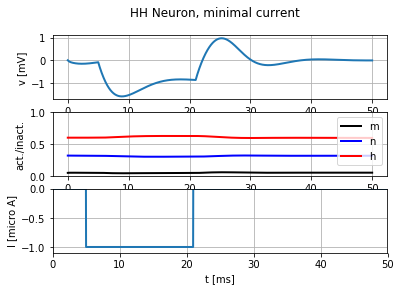

In [11]:
current = input_factory.get_step_current(5, 20, b2.ms, -1 *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 50 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

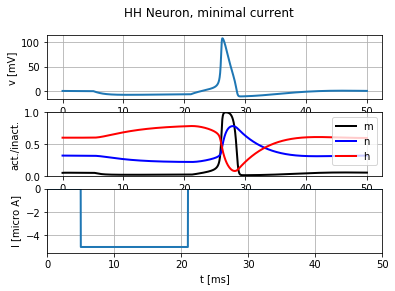

In [12]:
current = input_factory.get_step_current(5, 20, b2.ms, -5 *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 50 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

牛逼，怎么会这样。

我觉得应该是超极化让m变成0，h变成1。

但是再从超极化到静息态的时候，电压会变大，此时m迅速变大，
由于这个时候h比较慢，没有跟上m的变化，导致导电率增大，电流增大。

## 6.4. Exercise: Brian implementation of a HH neuron
In this exercise you will learn to work with the Brian2 model equations. To do so, get the source code of the function `HH.simulate_HH_neuron()` (follow the link to the documentation and then click on the [source] link). Copy the function code and paste it into your Jupyter Notebook. Change the function name from simulate_HH_neuron to a name of your choice. Have a look at the source code and find the conductance parameters gK and gNa.

In [13]:
def sim_HH(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens
    gNa = 120 * b2.msiemens
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon

### 6.4.1. Question
In the source code of your function, change the density of sodium channels. Increase it by a factor of 1.4. Stimulate this modified neuron with a step current.

- What is the minimal current leading to repetitive spiking? Explain.
- Run a simulation with no input current to determine the resting potential of the neuron. Link your observation to the Goldman–Hodgkin–Katz voltage equation.
- If you increase the sodium conductance further, you can observe repetitive firing even in the absence of input, why?

找不到这个钠的密度这个参数啊